In [1]:
import json
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib 
import os
from OS_CFAR_2D import DetectPeaksOSCFAR_2D
from scipy.special import softmax
from post_process_numpy_neu import peaks_detect,association,create_default,distribute,analyse,orent

In [2]:
device='cpu'
def_map = torch.rand((16,3,256,256))
mask, peak_cls = create_default(def_map.shape,(3,5))
mask = mask.to(device=device)
peak_cls = peak_cls.to(device=device)

In [115]:
destination = r'G:\EFS-GX6\4130_Arbeitsgruppen\4137_KHO_Performance\Studentische_Themen\RaviKothari\thesis\images\orien'
cam_dir = r'G:\EFS-GX6\4130_Arbeitsgruppen\4137_KHO_Performance\Studentische_Themen\RaviKothari\Dataset\CARRADA_old\Carrada\raw_radar'

In [132]:

for frame in range(2,3):
    grd_map = np.load(os.path.join(r'saved_output\5fr',str(frame)+'_grd_map.npy'))
    ra_map = np.load(os.path.join(r'saved_output\5fr',str(frame)+'_ra_map.npy'))
    pred_map_f = np.load(os.path.join(r'saved_output\5fr',str(frame)+'_preds_map.npy'))
    grd_o = np.load(os.path.join(r'saved_output\5fr',str(frame)+'_grd_o.npy'))
    pred_f = np.load(os.path.join(r'saved_output\5fr',str(frame)+'_preds_o.npy'))
    name = np.load(r'saved_output\5fr\name_list.npy',allow_pickle=True).item()



    pred_cp_f =torch.Tensor().to(device =device)
    grd_cp_f =torch.Tensor().to(device =device)

    grd_intent,grd_idx = peaks_detect(torch.from_numpy(grd_map).to(device=device),mask,peak_cls,heat_thresh=0.8)
    grd_idx = distribute(grd_idx,device)
    grd_idx=grd_idx.to(device=device)
    #grd_idx,grd_intent= association(grd_intent,grd_idx,device)

    pred_intent_f,pred_idx_f = peaks_detect(torch.from_numpy(pred_map_f).to(device=device),mask,peak_cls,heat_thresh=0.2)
    pred_idx_f = distribute(pred_idx_f,device)
    #print(len(pred_idx[0]))
    pred_idx_f,pred_intent_f= association(pred_intent_f,pred_idx_f,device)
    pred_idx_f=pred_idx_f.to(device=device)

    grd_cp_f,prd_cp_f = analyse(grd_idx,pred_idx_f,grd_cp_f,pred_cp_f,frame,dist_thresh=2)
    pred_idx_f =pred_idx_f.numpy()
    grd_cp_f = np.reshape(grd_cp_f.numpy(),(len(grd_cp_f.numpy())//5,5)).astype('int')
    prd_cp_f = np.reshape(prd_cp_f.numpy(),(len(prd_cp_f.numpy())//5,5)).astype('int')

    tp_cord_f = dict()
    tp_cord_f['prd']={}
    tp_cord_f['grd']={}
    for i in range(16):
        tp_cord_f['prd'][f"{i}"]={}
        tp_cord_f['grd'][f"{i}"]={}
        for j in range(3):
            tp_cord_f['prd'][f"{i}"][f"{j}"]=[]
            tp_cord_f['grd'][f"{i}"][f"{j}"]=[]


    for ind in prd_cp_f:
        frm = ind[0]
        c_ind = ind[1]
        cord = ind[2:4]
        tp_cord_f['prd'][f"{frm}"][f"{c_ind}"].append(cord)

    for ind in grd_cp_f:
        frm = ind[0]
        c_ind = ind[1]
        cord = ind[2:4]
        tp_cord_f['grd'][f"{frm}"][f"{c_ind}"].append(cord)







    #grd_map = np.load(f"output\saved_baseline\{frame}_grd_map.npy")
    #ra_map = np.load(f"output\saved_baseline\{frame}_ra_map.npy")
    pred_map_t = np.load(os.path.join(r'saved_output\3fr',str(frame)+'_preds_map.npy'))
    pred_t = np.load(os.path.join(r'saved_output\3fr',str(frame)+'_preds_o.npy'))


    pred_cp_t =torch.Tensor().to(device =device)
    grd_cp_t =torch.Tensor().to(device =device)

    grd_intent,grd_idx = peaks_detect(torch.from_numpy(grd_map).to(device=device),mask,peak_cls,heat_thresh=0.8)
    grd_idx = distribute(grd_idx,device)
    grd_idx=grd_idx.to(device=device)
    #grd_idx,grd_intent= association(grd_intent,grd_idx,device)

    pred_intent_t,pred_idx_t = peaks_detect(torch.from_numpy(pred_map_t).to(device=device),mask,peak_cls,heat_thresh=0.2)
    pred_idx_t = distribute(pred_idx_t,device)
    #print(len(pred_idx[0]))
    pred_idx_t,pred_intent_t= association(pred_intent_t,pred_idx_t,device)
    pred_idx_t=pred_idx_t.to(device=device)

    grd_cp_t,prd_cp_t = analyse(grd_idx,pred_idx_t,grd_cp_t,pred_cp_t,frame,dist_thresh=2)
    pred_idx_t =pred_idx_t.numpy()
    grd_idx = grd_idx.numpy()
    grd_cp_t = np.reshape(grd_cp_t.numpy(),(len(grd_cp_t.numpy())//5,5)).astype('int')
    prd_cp_t = np.reshape(prd_cp_t.numpy(),(len(prd_cp_t.numpy())//5,5)).astype('int')

    tp_cord_t = dict()
    tp_cord_t['prd']={}
    tp_cord_t['grd']={}
    for i in range(16):
        tp_cord_t['prd'][f"{i}"]={}
        tp_cord_t['grd'][f"{i}"]={}
        for j in range(3):
            tp_cord_t['prd'][f"{i}"][f"{j}"]=[]
            tp_cord_t['grd'][f"{i}"][f"{j}"]=[]


    for ind in prd_cp_t:
        frm = ind[0]
        c_ind = ind[1]
        cord = ind[2:4]
        tp_cord_t['prd'][f"{frm}"][f"{c_ind}"].append(cord)

    for ind in grd_cp_t:
        frm = ind[0]
        c_ind = ind[1]
        cord = ind[2:4]
        tp_cord_t['grd'][f"{frm}"][f"{c_ind}"].append(cord)
    
    # single frame 
    pred_map_s = np.load(os.path.join(r'saved_output\1fr',str(frame)+'_preds_map.npy'))
    pred_s = np.load(os.path.join(r'saved_output\1fr',str(frame)+'_preds_o.npy'))


    pred_cp_s =torch.Tensor().to(device =device)
    grd_cp_s =torch.Tensor().to(device =device)

    grd_intent,grd_idx = peaks_detect(torch.from_numpy(grd_map).to(device=device),mask,peak_cls,heat_thresh=0.8)
    grd_idx = distribute(grd_idx,device)
    grd_idx=grd_idx.to(device=device)
    #grd_idx,grd_intent= association(grd_intent,grd_idx,device)

    pred_intent_s,pred_idx_s = peaks_detect(torch.from_numpy(pred_map_s).to(device=device),mask,peak_cls,heat_thresh=0.2)
    pred_idx_s = distribute(pred_idx_s,device)
    #print(len(pred_idx[0]))
    pred_idx_s,pred_intent_s= association(pred_intent_s,pred_idx_s,device)
    pred_idx_s=pred_idx_s.to(device=device)

    grd_cp_s,prd_cp_s = analyse(grd_idx,pred_idx_s,grd_cp_s,pred_cp_s,frame,dist_thresh=2)
    pred_idx_s =pred_idx_s.numpy()
    grd_idx = grd_idx.numpy()
    grd_cp_s = np.reshape(grd_cp_s.numpy(),(len(grd_cp_s.numpy())//5,5)).astype('int')
    prd_cp_s = np.reshape(prd_cp_s.numpy(),(len(prd_cp_s.numpy())//5,5)).astype('int')

    tp_cord_s = dict()
    tp_cord_s['prd']={}
    tp_cord_s['grd']={}
    for i in range(16):
        tp_cord_s['prd'][f"{i}"]={}
        tp_cord_s['grd'][f"{i}"]={}
        for j in range(3):
            tp_cord_s['prd'][f"{i}"][f"{j}"]=[]
            tp_cord_s['grd'][f"{i}"][f"{j}"]=[]


    for ind in prd_cp_s:
        frm = ind[0]
        c_ind = ind[1]
        cord = ind[2:4]
        tp_cord_s['prd'][f"{frm}"][f"{c_ind}"].append(cord)

    for ind in grd_cp_s:
        frm = ind[0]
        c_ind = ind[1]
        cord = ind[2:4]
        tp_cord_s['grd'][f"{frm}"][f"{c_ind}"].append(cord)

    #for idx in range(pred_map.shape[0]):
    for idx in range(6,7): 
        seqn,frt=name[str(frame)][str(idx)].split('_')  
        frt,_=frt.split('.')


        ra_mapfar = ra_map[idx,0,::]
        
        pred_inst_f = np.copy(pred_map_f[idx,:,:,:])
        pred_inst_t = np.copy(pred_map_t[idx,:,:,:])
        pred_inst_s = np.copy(pred_map_s[idx,:,:,:])

        ra_size = pred_inst_f.shape[1:]
        fig, ax  = plt.subplots(1,4,figsize = (20,5))
        #plt.title('Predictions')
        #plt.suptitle('Predictions vs GT')
        #fig.tight_layout()
        ax[0].axis('off')
        
        ax[0].imshow(mpimg.imread(os.path.join(cam_dir,seqn,'camera_images',frt+'.jpg')))
        #ax[1,0].imshow(ra_mapfar)
        ax[0].title.set_text('Image View')
        ax[0].title.set_fontsize(14)


        color_map = ['Blues','Greens','Reds']
        title = ['Pedestrain','Cyclist', 'Car']
        
        
        ax[1].title.set_text('5 Frame')
        ax[1].title.set_fontsize(14)
        ax[2].title.set_text('3 Frame')
        ax[2].title.set_fontsize(14)
        ax[3].title.set_text('1 Frame')
        ax[3].title.set_fontsize(14)

        for i in range(1,4):
            ax[i].set_xticks([0, ra_size[1]*1/4-1,ra_size[1]*2/4-1,ra_size[1]*3/4-1,ra_size[1]-1])
            ax[i].set_yticks([0,ra_size[1]*1/5-1,ra_size[1]*2/5-1,ra_size[1]*3/5-1, ra_size[1]*4/5-1,ra_size[1]-1])
            ax[i].set_yticklabels([50, 40, 30, 20, 10, 0])
            ax[i].set_xticklabels(np.round(np.rad2deg(np.arcsin(np.linspace(-1,1,5))),1))
            ax[i].set_xlabel('Angle (Degree)')
            if i==1:ax[i].set_ylabel('Distance (m)')
            ax[i].set_xlim(0,ra_map.shape[2])
            ax[i].set_ylim(0,ra_map.shape[3])
            ax[i].invert_yaxis()


        cord = dict()
        cord['Pred'] ={'0':[],'1':[],'2':[]}
        cord['GT'] ={'0':[],'1':[],'2':[]}



        #ax[2].set_xlim(0,ra_map.shape[2])
        #ax[2].set_ylim(0,ra_map.shape[3])

        
        color = ['blue','green','red']

        # 5 frame scatter plot
        k=25
        for cnt,pred_cord in enumerate(pred_idx_f):
            if pred_cord[0]==idx :
                chn = pred_cord[1]
                row , col ,intent= pred_cord[2],pred_cord[3], pred_intent_f[cnt]

                ang = orent(torch.from_numpy(pred_f[idx,::]),int(row//4),int(col//4))
                si = np.sin(np.deg2rad(ang))
                ci = np.cos(np.deg2rad(ang))        
                
                false_p = tp_cord_f['prd'][f"{int(idx)}"][f"{int(chn)}"]
                token = False
                for cord_fp in false_p:
                    if int(row)==cord_fp[0] and int(col) == cord_fp[1]:
                        token = True
                        ax[1].scatter(int(col), int(row), s=100, edgecolors=color[int(chn)],marker="s", facecolor ='none')

                if not token:
                        ax[1].scatter(int(col), int(row), s=50, c=color[int(chn)],marker="s")
                        ax[1].text(col -5, int(row+5), "%.2f" % intent, color='black', fontsize=5)
                        ax[1].arrow(int(col), int(row),k*si,-k*ci,color =color[int(chn)],head_width=5)


        for cnt,grd_cord in enumerate(grd_idx):
            if grd_cord[0] ==idx:
                token = False
                chn = grd_cord[1]        
                row , col = grd_cord[2],grd_cord[3]
                
                tro_id = np.nonzero(grd_o[idx,0,::])
                if len(tro_id[0])>0:
                    tro_min  =np.argmin(np.abs(tro_id[0]-(row//4)))
                else:
                    tro_id = np.nonzero(grd_o[idx,1,::])
                    tro_min = np.argmin(np.abs(tro_id[0]-(row//4)))


                ang = orent(torch.from_numpy(grd_o[idx,::]),tro_id[0][tro_min],tro_id[1][tro_min])
                si = np.sin(np.deg2rad(ang))
                ci = np.cos(np.deg2rad(ang)) 

                false_n = tp_cord_f['grd'][f"{int(idx)}"][f"{int(chn)}"]
                for cord_fp in false_n:
                    if int(row)==cord_fp[0] and int(col) == cord_fp[1]: 
                        token=True
                        ax[1].scatter(int(col), int(row), s=100, edgecolors=color[int(chn)],marker="o", facecolor ='none')
                if not token:
                    ax[1].scatter(col,row, s=50, c=color[int(chn)],marker="o")
                    ax[1].arrow(int(col), int(row),k*si,-k*ci,color ='black',head_width=5,linestyle='--')
 
        # 3 frame scatter plot
        for cnt,pred_cord in enumerate(pred_idx_t):
            if pred_cord[0]==idx :
                chn = pred_cord[1]
                row , col ,intent= pred_cord[2],pred_cord[3], pred_intent_t[cnt]
                ang = orent(torch.from_numpy(pred_t[idx,::]),int(row//4),int(col//4))
                si = np.sin(np.deg2rad(ang))
                ci = np.cos(np.deg2rad(ang))  
                
                false_p = tp_cord_t['prd'][f"{int(idx)}"][f"{int(chn)}"]
                token = False
                for cord_fp in false_p:
                    if int(row)==cord_fp[0] and int(col) == cord_fp[1]:
                        token = True
                        ax[2].scatter(int(col), int(row), s=100, edgecolors=color[int(chn)],marker="s", facecolor ='none')

                if not token:
                        ax[2].scatter(int(col), int(row), s=50, c=color[int(chn)],marker="s")
                        ax[2].text(col -5, int(row+5), "%.2f" % intent, color='black', fontsize=5)
                        ax[2].arrow(int(col), int(row),k*si,-k*ci,color =color[int(chn)],head_width=5)

        for cnt,grd_cord in enumerate(grd_idx):
            if grd_cord[0] ==idx:
                token = False
                chn = grd_cord[1]        
                row , col = grd_cord[2],grd_cord[3]
                tro_id = np.nonzero(grd_o[idx,0,::])
                if len(tro_id[0])>0:
                    tro_min  =np.argmin(np.abs(tro_id[0]-(row//4)))
                else:
                    tro_id = np.nonzero(grd_o[idx,1,::])
                    tro_min = np.argmin(np.abs(tro_id[0]-(row//4)))

                ang = orent(torch.from_numpy(grd_o[idx,::]),tro_id[0][tro_min],tro_id[1][tro_min])
                si = np.sin(np.deg2rad(ang))
                ci = np.cos(np.deg2rad(ang))
                
                false_n = tp_cord_t['grd'][f"{int(idx)}"][f"{int(chn)}"]
                for cord_fp in false_n:
                    if int(row)==cord_fp[0] and int(col) == cord_fp[1]: 
                        token=True
                        ax[2].scatter(int(col), int(row), s=100, edgecolors=color[int(chn)],marker="o", facecolor ='none')
                if not token:
                    ax[2].scatter(col,row, s=50, c=color[int(chn)],marker="o")    
                    ax[2].arrow(int(col), int(row),k*si,-k*ci,color ='black',head_width=5,linestyle='--')
 
        
        # 1 frame scatter plot
        for cnt,pred_cord in enumerate(pred_idx_s):
            if pred_cord[0]==idx :
                chn = pred_cord[1]
                row , col ,intent= pred_cord[2],pred_cord[3], pred_intent_s[cnt]
                ang = orent(torch.from_numpy(pred_t[idx,::]),int(row//4),int(col//4))
                si = np.sin(np.deg2rad(ang))
                ci = np.cos(np.deg2rad(ang))  
                
                false_p = tp_cord_s['prd'][f"{int(idx)}"][f"{int(chn)}"]
                token = False
                for cord_fp in false_p:
                    if int(row)==cord_fp[0] and int(col) == cord_fp[1]:
                        token = True
                        ax[3].scatter(int(col), int(row), s=100, edgecolors=color[int(chn)],marker="s", facecolor ='none')

                if not token:
                        ax[3].scatter(int(col), int(row), s=50, c=color[int(chn)],marker="s")
                        ax[3].text(col -5, int(row+5), "%.2f" % intent, color='black', fontsize=5)
                        ax[3].arrow(int(col), int(row),k*si,-k*ci,color =color[int(chn)],head_width=5)

        for cnt,grd_cord in enumerate(grd_idx):
            if grd_cord[0] ==idx:
                token = False
                chn = grd_cord[1]        
                row , col = grd_cord[2],grd_cord[3]
                tro_id = np.nonzero(grd_o[idx,0,::])
                if len(tro_id[0])>0:
                    tro_min  =np.argmin(np.abs(tro_id[0]-(row//4)))
                else:
                    tro_id = np.nonzero(grd_o[idx,1,::])
                    tro_min = np.argmin(np.abs(tro_id[0]-(row//4)))

                ang = orent(torch.from_numpy(grd_o[idx,::]),tro_id[0][tro_min],tro_id[1][tro_min])
                si = np.sin(np.deg2rad(ang))
                ci = np.cos(np.deg2rad(ang))
                print(si,ci,tro_min,row,col)
                
                false_n = tp_cord_s['grd'][f"{int(idx)}"][f"{int(chn)}"]
                for cord_fp in false_n:
                    if int(row)==cord_fp[0] and int(col) == cord_fp[1]: 
                        token=True
                        ax[3].scatter(int(col), int(row), s=100, edgecolors=color[int(chn)],marker="o", facecolor ='none')
                if not token:
                    ax[3].scatter(col,row, s=50, c=color[int(chn)],marker="o")    
                    ax[3].arrow(int(col), int(row),k*si,-k*ci,color ='black',head_width=5,linestyle='--')
 
        
        #plt.savefig(os.path.join(destination,str(frame)+'_'+str(idx)+'.png'))
        plt.savefig(os.path.join(destination,str(frame)+'_'+str(idx)+'.jpg'),dpi=1200)
        plt.close()
                        


tensor(-8.7423e-08) tensor(-1.) 0 48.0 117.0
tensor(-8.7423e-08) tensor(-1.) 0 176.0 85.0


In [136]:
tro_id[0][0]

12

In [103]:
for x in tro_id[0]:
    print('in')

In [127]:
name[str(frame)][str(idx)]

'2020-02-28-12-16-05_000087.npy'

In [131]:
grd_idx

array([[  0.,   0., 202.,  61.],
       [  1.,   1., 176.,  67.],
       [  2.,   0., 201., 181.],
       [  3.,   2.,  93., 135.],
       [  4.,   0.,  46., 129.],
       [  4.,   0., 211.,  89.],
       [  5.,   0.,  82., 132.],
       [  5.,   1., 121., 118.],
       [  6.,   0.,  48., 117.],
       [  6.,   1., 176.,  85.],
       [  7.,   0.,  56., 116.],
       [  7.,   1., 123., 116.],
       [  8.,   2., 147., 131.],
       [  9.,   1., 182., 232.],
       [  9.,   2., 182., 188.],
       [ 10.,   2., 202., 138.],
       [ 11.,   1., 226., 126.],
       [ 11.,   2.,  85., 130.],
       [ 12.,   1., 199.,  94.],
       [ 13.,   2.,  62., 133.],
       [ 14.,   2., 193., 118.],
       [ 15.,   2., 218.,  82.]], dtype=float32)

In [137]:
ang = orent(torch.from_numpy(grd_o[6,::]),12,29).numpy()

In [138]:
si = np.sin(np.deg2rad(ang))
ci = np.cos(np.deg2rad(ang))

In [139]:
si,ci

(-8.742278e-08, -1.0)

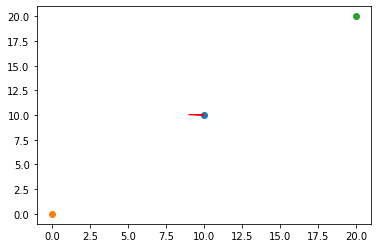

In [57]:
plt.scatter(10,10)
plt.scatter(0,0)
plt.scatter(20,20)
plt.arrow(10,10,si,ci,color ='Red')

In [128]:
anno = np.load('gt_annotation.npy',allow_pickle=True).item()

In [65]:
seq,fr = name['2']['1'].split('_')

In [130]:
frt

'000087'

In [129]:
anno[str(seqn)][str(frt)]

{'cls': [2.0, 1.0],
 'idx': [[68.0, 168.0, 108.0, 188.0], [100.0, 39.0, 140.0, 59.0]],
 'key': ['a1', 'r1', 'a2', 'r2'],
 'velo': [1.9285714285714288, -1.9285714285714288],
 'mu_r': [177.45384615384614, 49.28042328042328],
 'mu_a': [87.58461538461539, 119.55026455026454],
 'sigma_r': [4.919682882673472, 6.07582301847211],
 'sigma_a': [12.176852239847511, 10.610305229224108],
 'sigma_cov': [array([0.64875367]), array([0.17517051, 0.16277966])],
 'orent': [0, 180]}

In [72]:
np.ceil(67/4)

17.0

In [67]:
anno[seq]['000345']

{'cls': [2.0],
 'idx': [[48.0, 168.0, 88.0, 188.0]],
 'key': ['a1', 'r1', 'a2', 'r2'],
 'velo': [1.0714285714285712],
 'mu_r': [176.85534591194968],
 'mu_a': [68.49685534591195],
 'sigma_r': [2.5052766541371896],
 'sigma_a': [9.992322504598455],
 'sigma_cov': [array([0.37075023])],
 'orent': [281.8505330007547, 0]}

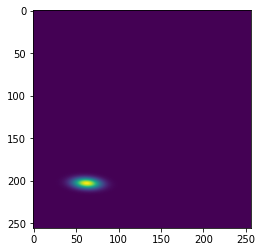

In [28]:
plt.imshow(grd_map[0,0,::])